In [5]:
from pathlib import Path
import pandas as pd
import torch
from numpy.ma.core import shape
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# ---------- 1. Initial Samples  ---------- #
# Initial Samples from source task
current_dir = Path.cwd()
csv_path = current_dir.parent / "data" / "Classifier.csv"
df = pd.read_csv(csv_path)
X = torch.tensor(df[["power", "hatch_distance"]].values, dtype=torch.double)
Y = torch.tensor(df[["fused"]].values, dtype=torch.double).squeeze()

print(X.shape)
print(Y.shape)

torch.Size([60, 2])
torch.Size([60])


In [6]:
# 2. 拆分训练测试集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=37)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([48, 2]) torch.Size([12, 2]) torch.Size([48]) torch.Size([12])


=== report ===
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92         6
         1.0       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



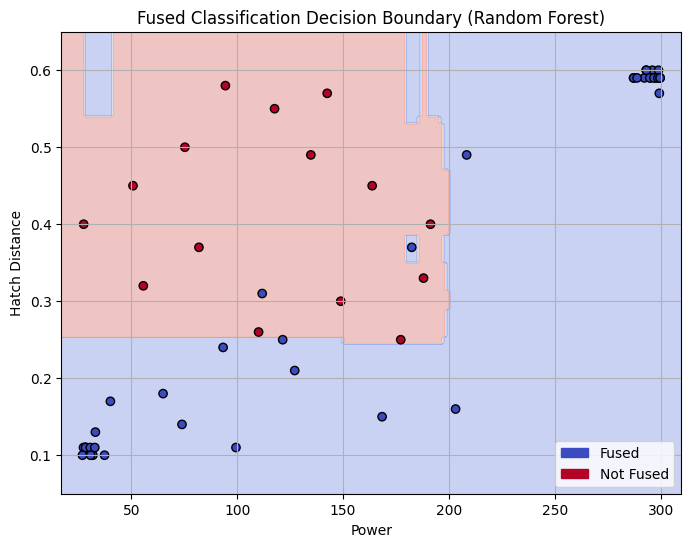

In [7]:
# 3. train
clf = RandomForestClassifier(n_estimators=1000, random_state=96)
clf.fit(X_train, y_train)

# 4. evolution
y_pred = clf.predict(X_test)
print("=== report ===")
print(classification_report(y_test, y_pred))

#   model\target  |  positive       | negative
#--------------------------------------------------
#       ture      |  ture_positive  | false_positive             
#--------------------------------------------------
#       false     |  false_negative | ture_negative
#-------------------------------------------------- 
# precision = ture_positive/(ture_positive+false_positive) 
# recall = ture_positive/(ture_positive+false_negative)
# 5. visualization
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm_r')
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap='coolwarm_r')
plt.xlabel('Power')
plt.ylabel('Hatch Distance')
plt.title('Fused Classification Decision Boundary (Random Forest)')
red_patch = patches.Patch(color=plt.cm.coolwarm_r(1.0), label='Fused')  # 红色区域
blue_patch = patches.Patch(color=plt.cm.coolwarm_r(0.0), label='Not Fused')     # 蓝色区域
plt.legend(handles=[red_patch, blue_patch], loc='lower right')
plt.grid(True)
plt.show()

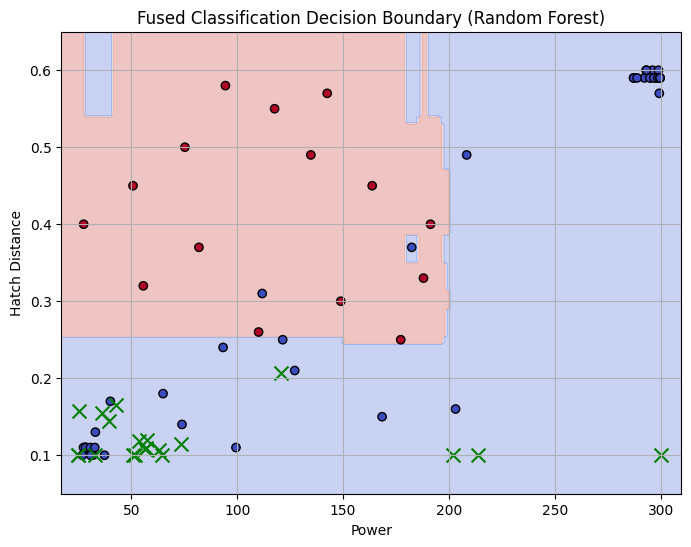

In [8]:
x_new1 = torch.tensor([[6.3265e+01, 1.0704e-01, 2.5000e+01],
        [2.5000e+01, 1.0000e-01, 2.5000e+01],
        [4.2577e+01, 1.6563e-01, 1.1255e+02],
        [1.2055e+02, 2.0673e-01, 2.8106e+01],
        [2.1368e+02, 1.0000e-01, 7.8716e+01],
        [5.1581e+01, 1.0000e-01, 2.5000e+01],
        [3.5985e+01, 1.5497e-01, 4.4081e+01],
        [2.0204e+02, 1.0000e-01, 5.7662e+01],
        [5.3703e+01, 1.1819e-01, 2.5000e+01],
        [3.9497e+01, 1.4439e-01, 1.3874e+02]],
       dtype=torch.float64)
x_new2 = torch.tensor([[5.6281e+01, 1.0803e-01, 2.5000e+01],
        [2.5000e+01, 1.0000e-01, 2.5000e+01],
        [2.5572e+01, 1.5718e-01, 1.1780e+02],
        [5.7270e+01, 1.1937e-01, 2.5000e+01],
        [3.0000e+02, 1.0000e-01, 2.5000e+01],
        [6.4586e+01, 1.0000e-01, 2.5000e+01],
        [5.1007e+01, 1.0000e-01, 3.0987e+01],
        [7.3615e+01, 1.1414e-01, 2.5000e+01],
        [3.3002e+01, 1.0000e-01, 4.4826e+01],
        [5.7018e+01, 1.0988e-01, 2.5000e+01]],
       dtype=torch.float64)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm_r')
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap='coolwarm_r')
plt.scatter(x_new1[:, 0], x_new1[:, 1], c='green', marker='x', s=100, label='New Candidates')
plt.scatter(x_new2[:, 0], x_new2[:, 1], c='green', marker='x', s=100, label='New Candidates')
plt.xlabel('Power')
plt.ylabel('Hatch Distance')
plt.title('Fused Classification Decision Boundary (Random Forest)')
plt.grid(True)
plt.show()

In [42]:
import torch

batch_size = 20
print(X.shape[1])
X_next = np.empty((0, X.shape[1]+1))
print(X_next.shape)
i = 0
while len(X_next) < batch_size:
    X_candidates = torch.tensor([[6.3265e+01, 1.0704e-01, 2.5000e+01],
        [2.5000e+01, 1.0000e-01, 2.5000e+01],
        [4.2577e+01, 1.6563e-01, 1.1255e+02],
        [1.2055e+02, 2.0673e-01, 2.8106e+01],
        [2.1368e+02, 1.0000e-01, 7.8716e+01],
        [5.1581e+01, 1.0000e-01, 2.5000e+01],
        [3.5985e+01, 1.5497e-01, 4.4081e+01],
        [2.0204e+02, 1.0000e-01, 5.7662e+01],
        [5.3703e+01, 1.1819e-01, 2.5000e+01],
        [3.9497e+01, 1.4439e-01, 1.3874e+02],
        [5.6281e+01, 1.0803e-01, 2.5000e+01],
        [2.5000e+01, 1.0000e-01, 2.5000e+01],
        [2.5572e+01, 1.5718e-01, 1.1780e+02],
        [5.7270e+01, 1.1937e-01, 2.5000e+01],
        [3.0000e+02, 1.0000e-01, 2.5000e+01],
        [6.4586e+01, 5.0000e-01, 2.5000e+01],
        [5.1007e+01, 1.0000e-01, 3.0987e+01],
        [7.3615e+01, 5.1414e-01, 2.5000e+01],
        [3.3002e+01, 1.0000e-01, 4.4826e+01],
        [5.7018e+01, 1.0988e-01, 2.5000e+01]],
       dtype=torch.float64)
    X_candidates = X_candidates.detach().cpu().numpy()
    # print(X_candidates)
    # filter
    preds = clf.predict(X_candidates[:,0:2])
    fused_mask = preds == 1
    X_next = X_candidates[fused_mask]
    i = i+1
    print(i)
print(X_next.shape)

2
(0, 3)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80


KeyboardInterrupt: 

In [45]:
X_candidates = torch.tensor([[1.26444932e+02, 5.58185164e-01, 1.94089726e+02],
 [2.56356121e+02, 4.21573933e-01, 2.70986649e+02],
 [4.01333918e+01, 1.00000000e-01, 2.50000000e+01],
 [1.04619612e+02, 6.00000000e-01, 1.00230657e+02],
 [1.76688774e+02, 5.99047437e-01, 2.34653449e+02],
 [1.69136902e+02, 1.93632445e-01, 5.60841201e+01],
 [6.72871055e+01, 1.09465950e-01, 2.50000000e+01],
 [4.80187926e+01, 5.99999928e-01, 1.39131452e+02],
 [2.12935520e+02, 6.00000000e-01, 2.83093684e+01],
 [7.30024900e+01, 4.78599823e-01, 2.15424368e+02],
 [5.75778910e+01, 1.14849807e-01, 2.50000000e+01],
 [5.71092624e+01, 6.00000000e-01, 3.33478006e+01],
 [4.17883284e+01, 1.00875055e-01, 4.48037851e+01],
 [1.32330498e+02, 3.98971504e-01, 8.34437737e+01],
 [2.50000000e+01, 1.00000000e-01, 2.50000000e+01],
 [1.35915152e+02, 5.75058133e-01, 1.47300225e+02],
 [1.12099084e+02, 2.61058374e-01, 2.95282883e+02],
 [1.23083425e+02, 5.98724127e-01, 2.06296584e+02],
 [1.54307877e+02, 1.07822954e-01, 3.35053925e+01],
 [5.49474578e+01, 1.00000000e-01, 2.50000000e+01],
 [1.85304976e+02, 6.00000000e-01, 2.43406077e+02],
 [2.01530320e+02, 5.41842032e-01, 2.18413402e+02],
 [5.39595099e+01, 1.00000000e-01, 3.12898763e+01],
 [1.47906624e+02, 5.37584247e-01, 2.64507162e+02],
 [5.59690771e+01, 1.13177235e-01, 2.50000000e+01],
 [1.45615947e+02, 4.53527070e-01, 2.56637154e+02],
 [2.12924844e+02, 1.90057818e-01, 2.47987534e+02],
 [2.99833743e+02, 5.02391225e-01, 9.75773866e+01],
 [2.64694949e+02, 3.49146751e-01, 9.49390678e+01],
 [1.07795392e+02, 1.60663256e-01, 2.86849656e+02],
 [9.72782837e+01, 1.00000000e-01, 2.50000000e+01],
 [5.49283550e+01, 5.99340062e-01, 2.93821297e+02],
 [2.99973280e+02, 6.00000000e-01, 3.42008173e+01],
 [1.95356912e+02, 1.00000000e-01, 1.16388954e+02],
 [9.25606377e+01, 1.00000000e-01, 1.49997758e+02],
 [5.36404991e+01, 1.09012825e-01, 2.50000000e+01],
 [2.14570434e+02, 1.56249670e-01, 2.20257570e+02],
 [2.34620510e+02, 4.47108916e-01, 2.96731275e+02],
 [2.31033991e+02, 4.74283769e-01, 5.08249602e+01],
 [1.11323071e+02, 1.85194122e-01, 3.57431933e+01]],
       dtype=torch.float64)
X_candidates = X_candidates.detach().cpu().numpy()
    # print(X_candidates)
    # filter
preds = clf.predict(X_candidates[:,0:2])
print(preds)


[0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
